# Hypothesis testing and statistical analysis

## Get the data (1 mark)

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is derived from the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. The samples were sampled from this data by Jonathan Shapiro.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("census11sample.csv")
pd.set_option('display.max_rows',1000)
df = df.drop("Unnamed: 0", axis=1)
display(df)

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
5,27,26,66,70,33,41,38,78,63
6,42,44,49,59,40,65,13,8,52
7,62,44,41,76,8,74,54,40,72
8,34,17,33,71,45,73,1,77,75
9,15,46,37,3,13,41,19,47,69


## Divide the data (2 marks)

In [2]:
from sklearn.model_selection import train_test_split
sample_explore, sample_test = train_test_split(df, test_size=0.5, random_state=48)

print((sample_explore.shape)[0])
print((sample_test.shape)[0])

500
500


## Explore the data (5 marks)

In [15]:
for col_name in sample_explore.columns:
    print(col_name)
    df = sample_explore[col_name]
    print(df.describe().round(2))
    print("")
    

North East
count    500.00
mean      41.77
std       22.91
min        0.00
25%       23.75
50%       43.00
75%       59.00
max       94.00
Name: North East, dtype: float64

North West
count    500.00
mean      39.53
std       23.37
min        0.00
25%       19.00
50%       41.00
75%       57.00
max       98.00
Name: North West, dtype: float64

Yorkshire and The Humber
count    500.00
mean      39.53
std       23.12
min        0.00
25%       20.00
50%       40.00
75%       57.00
max      100.00
Name: Yorkshire and The Humber, dtype: float64

East Midlands
count    500.00
mean      38.76
std       23.91
min        0.00
25%       18.00
50%       38.00
75%       58.00
max       95.00
Name: East Midlands, dtype: float64

West Midlands
count    500.00
mean      40.04
std       23.28
min        0.00
25%       21.00
50%       39.00
75%       58.00
max       96.00
Name: West Midlands, dtype: float64

East of England
count    500.00
mean      41.82
std       23.28
min        0.00
25%       24.00

In [16]:
#Re-order the dataframe columns based on the mean age in each region
means = sample_explore.mean(axis=0)
means_df = pd.DataFrame(means).transpose()
sorted_columns = means.sort_values().index
sample_explore_sorted = sample_explore.reindex(columns=sorted_columns)

#Make a dataframe for the means 
means_df = means_df.reindex(columns=sorted_columns)
means_df.index = ['Mean (Ascending)']

#Make and reorder a dataframe for the standard deviations 
stds = sample_explore.std(axis=0)
stds_df = pd.DataFrame(stds).transpose()
stds_df = stds_df.reindex(columns=sorted_columns)
stds_df.index = ['Standard Deviation']

#Make and reorder a dataframe for the medians
medians = sample_explore.median(axis=0)
medians_df = pd.DataFrame(medians).transpose()
medians_df = medians_df.reindex(columns=sorted_columns)
medians_df.index = ['Median']

#Define function for computing the IQR of each region
def get_IQR(col):
    Q3 = np.quantile(sample_explore[col], 0.75)
    Q1 = np.quantile(sample_explore[col], 0.25)
    IQR = Q3 - Q1
    return IQR

#Make and reorder a dataframe for the IQRs (using the function)
IQRs = {}
for column_name in sample_explore.columns:
    IQRs[column_name] = [get_IQR(column_name)]
IQRs_df = pd.DataFrame(IQRs)
IQRs_df = IQRs_df.reindex(columns=sorted_columns)
IQRs_df.index = ['IQR']

#Combine the dataframes and display
combined_df = pd.concat([means_df, stds_df, medians_df, IQRs_df])
combined_df = combined_df.round(2)
combined_df


,London,East Midlands,North West,Yorkshire and The Humber,West Midlands,South East,North East,East of England,South West
Mean (Ascending),35.57,38.76,39.53,39.53,40.04,41.62,41.77,41.82,44.73
Standard Deviation,22.46,23.91,23.37,23.12,23.28,23.02,22.91,23.28,24.06
Median,33.50,38.00,41.00,40.00,39.00,42.00,43.00,42.00,45.00
IQR,35.00,40.00,38.00,37.00,37.00,36.00,35.25,36.00,37.00


<b>Analysis:</b> Most regions in the South of the country seem to have a higher mean age than regions in the North/Midland category. The standard deviations seem to increase with the means, but not by a significant amount. 

We could consider splitting the data into North/Midlands and South categories to explore this observation further. 

The order of the medians are mostly in accordance with the order of the means, so there is little evidence of any highly skewed distributions. The IQRs show a fairly random amount of range in each region, which should cancel out when looking at grouped category results.

### Histogram across 2 categories
<em> (North and Midlands = Yorkshire and the Humber, North West, West Midlands, East Midlands, North East)<br> 
(South = East of England, London, the South East and the South West)</em>

South category statistics
                 0
count  2000.000000
mean     40.935500
std      23.435634
min       0.000000
25%      22.000000
50%      41.000000
75%      58.000000
max      98.000000
North category statistics
                 0
count  2500.000000
mean     39.924400
std      23.323899
min       0.000000
25%      20.000000
50%      40.000000
75%      58.000000
max     100.000000


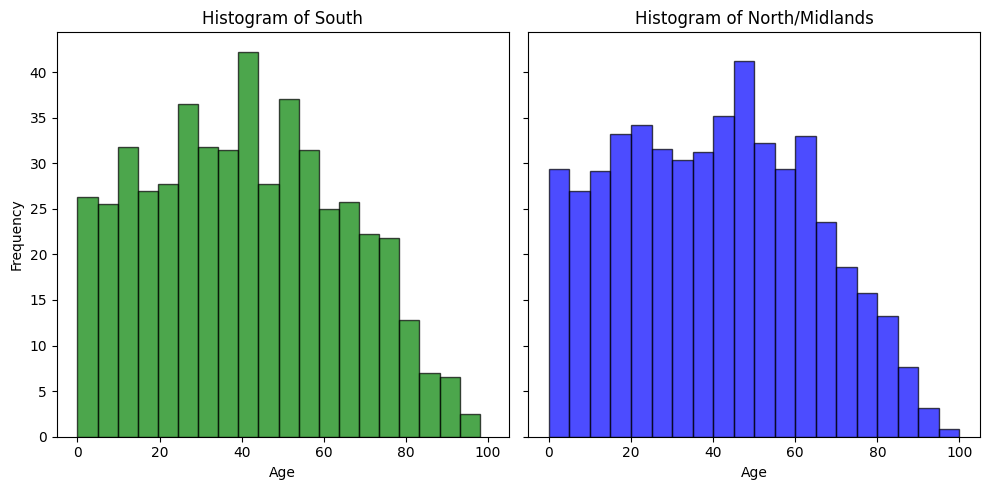

In [5]:
#Make the categories of combined region data
south = np.concatenate([sample_explore["London"], sample_explore["South East"], sample_explore["South West"], sample_explore["East of England"]]) 
north = np.concatenate([sample_explore["Yorkshire and The Humber"], sample_explore["East Midlands"], sample_explore["North West"], sample_explore["West Midlands"], sample_explore["North East"]]) 

#Print the key statistics for the combined categories
print("South category statistics")
print(pd.DataFrame(south).describe())
print("North category statistics")
print(pd.DataFrame(north).describe())

#Make a histogram for each category
weights_south = np.ones_like(south) / 4
weights_north = np.ones_like(north) / 5

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

axs[0].set_xlabel('Age')
axs[1].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

axs[0].hist(south, bins=20, color='green', alpha=0.7, edgecolor = "black", weights = weights_south)
axs[0].set_title('Histogram of South')

axs[1].hist(north, bins=20, color='blue', alpha=0.7, edgecolor = "black", weights = weights_north)
axs[1].set_title('Histogram of North/Midlands')

plt.tight_layout()

plt.show()


## State your hypothesis, and state the evidence that justifies it. (2 marks)

<b> Hypothesis:</b>  The mean age of people in the South of England, is higher than in the North and Midlands.<br>  

<b> Evidence:</b>  3 of 4 regions included in the South category have a higher mean (and histogram appearance) age than most regions in the North/Midland category. This suggests the overall average age for the South category will be higher than the average for the North/Midlands category.

## Plan the test. (3 marks)

<b>Null hypothesis:</b> The means of the ages in the North/Midlands and South categories come from the same distribution. Any differences between these means are due to natural statistical fluctuation. <br><br>
<b>Alternative hypothesis:</b> The means of the ages in the North/Midlands and South categories come from different distributions, where the mean of the South distribution is higher than the mean of the North/Midlands distribution. Any (positive) difference between these means is statistically significant.<br><br>
<b>Probability level:</b> 95%, therefore the ɑ-value will be 5%.

## Perform the statistical test of the hypothesis. (5 marks)

In [17]:
#Using a classical statistical Z-test
from scipy.stats import norm
alpha=0.05

#Create the categories of data from the test set
south = np.concatenate([sample_test["London"], sample_test["South East"], sample_test["South West"], sample_test["East of England"]]) 
north = np.concatenate([sample_test["Yorkshire and The Humber"], sample_test["East Midlands"], sample_test["North West"], sample_test["West Midlands"], sample_test["North East"]]) 

#Find difference in mean of the 2 categories - assume South>North from hypothesis
diff_in_means = south.mean() - north.mean()

#Find unbiased standard deviation for each category of data 
std_dev_south = np.std(south, ddof=1)
std_dev_north = np.std(north, ddof=1)

#Find standard deviation of the difference in means (SEM)
sem = np.sqrt(((std_dev_south)**2/len(south)) + ((std_dev_north)**2/len(north)))

#Compute the test statistic
z = diff_in_means/sem

#Perform the statistical test (using the inverse CDF) 
print("Inverse:")
critical_value = norm.ppf(1-alpha,0,1) 
print("The %2.2f percent critical value is %2.2f" %(alpha*100,critical_value))
print("The value of the test statistic is %2.2f" %(z))

#Perform the statistical test (using the p-value) 
print("Using p-value:")
p = 1-norm.cdf(z)
print("The p-value is %2.2f" %(p))
print("The a-value is %2.2f" %(alpha))

Inverse:
The 5.00 percent critical value is 1.64
The value of the test statistic is 0.46
Using p-value:
The p-value is 0.32
The a-value is 0.05


### A graph to illustrate the test results:

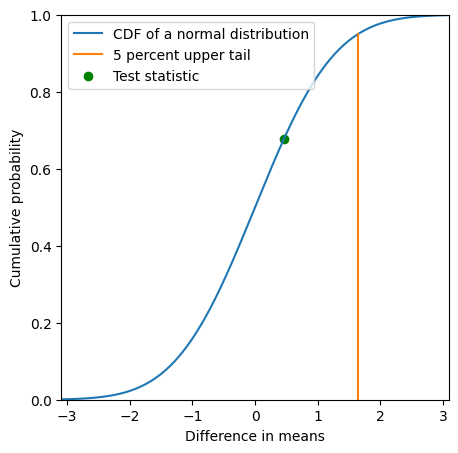

In [7]:
x=np.arange(norm.ppf(0.001,0,1),norm.ppf(0.999,0,1),0.01) 
plt.figure(figsize=(5,5))
plt.plot(x,norm.cdf(x,0,1), label='CDF of a normal distribution') 
u=norm.ppf(0.95,0,1)
v=norm.cdf(u,0,1) 
h=norm.cdf(z,0,1)
axes=plt.gca()
axes.set_xlim([x[0],x[len(x)-1]])
axes.set_ylim([0,1])
plt.plot([u,u],[0,v],label='5 percent upper tail')
plt.scatter(z, h, label = "Test statistic", color = 'green')
plt.xlabel("Difference in means")
plt.ylabel("Cumulative probability")
plt.legend()


## Conclusions. (2 Marks) 

<b>Conclusion:</b> Using an upper-tailed Z-test, the test statistic is lower than the critical value (and the p-value higher than a-value), which suggests that the differences in the mean ages are not statistically significant, therefore, there is <b>NOT</b> enough evidence to reject the null hypothesis at the 95% level.<br> <em>(The North/Midlands does not appear to have a different distribution of ages to the South)</em>